In [36]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2'] #df.dropna() -this will delete the rows with null values
del df['Product_Category_3']

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [17]:
for column in df.columns:
    print(column, "\t: " ,df[column].nunique(),"\t: ",df[column].unique())

User_ID 	:  5891 	:  [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID 	:  3623 	:  ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender 	:  2 	:  ['F' 'M']
Age 	:  7 	:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation 	:  21 	:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category 	:  3 	:  ['A' 'C' 'B']
Stay_In_Current_City_Years 	:  5 	:  ['2' '4+' '3' '1' '0']
Marital_Status 	:  2 	:  [0 1]
Product_Category_1 	:  18 	:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Purchase 	:  17959 	:  [ 8370 15200  1422 ... 14539 11120 18426]


<Axes: title={'center': 'Gender Ratio'}>

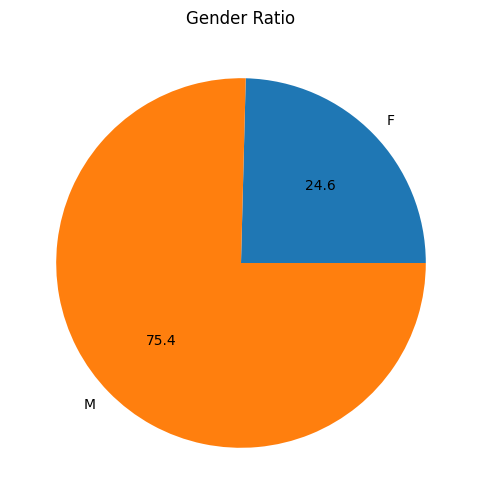

In [18]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 autopct = "%.1f",
                                 title = 'Gender Ratio',
                                 figsize = (6,6))

<Axes: ylabel='Purchase'>

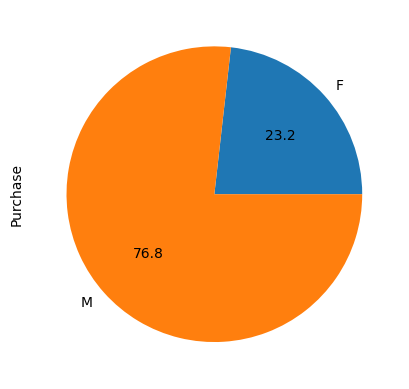

In [19]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<Axes: ylabel='Purchase'>

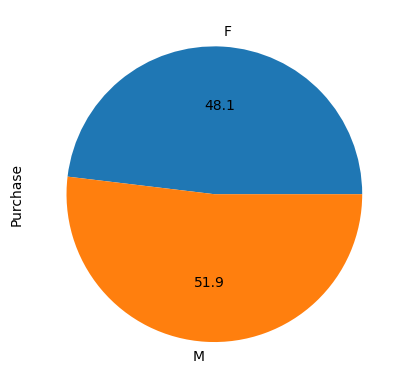

In [35]:
df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie', autopct = "%0.1f")

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

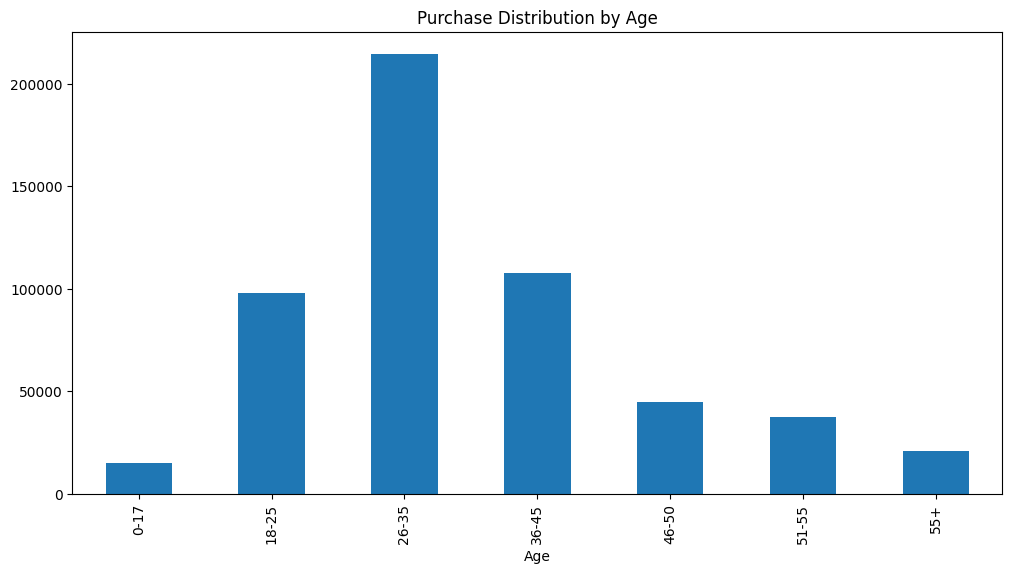

In [23]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

In [24]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

In [28]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

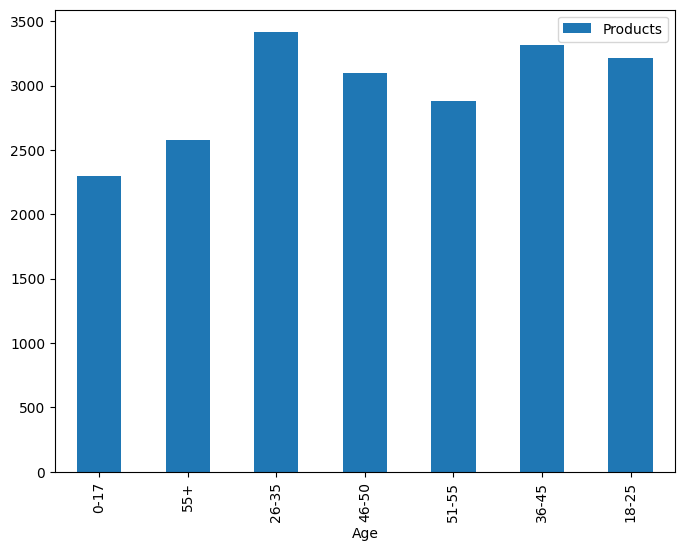

In [29]:
data.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

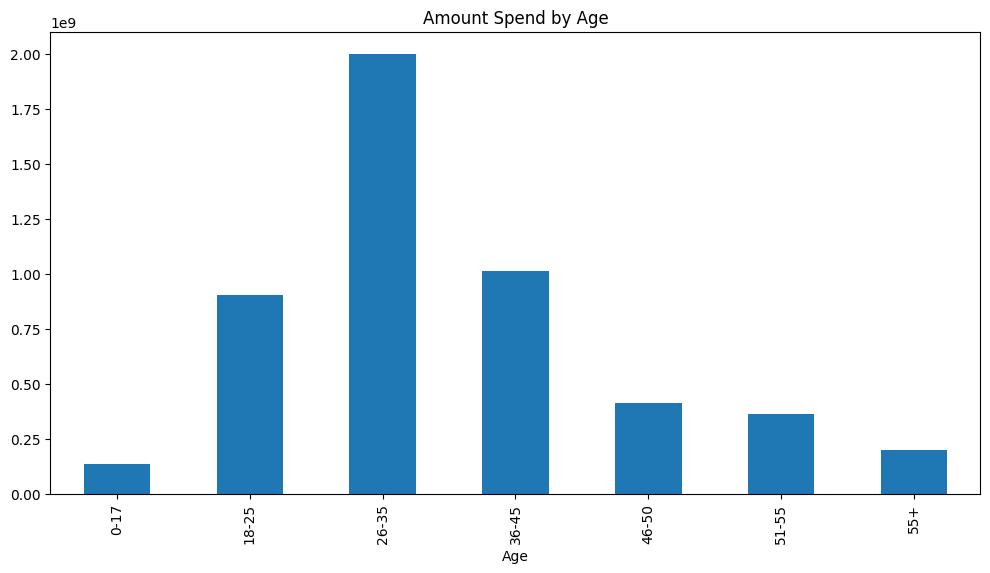

In [26]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: ylabel='Purchase'>

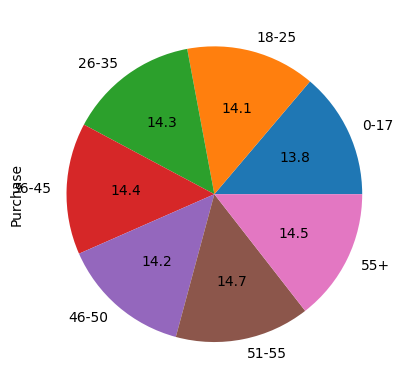

In [34]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

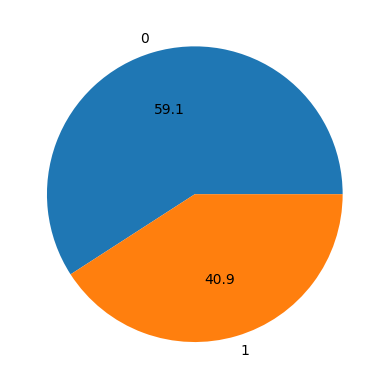

In [32]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

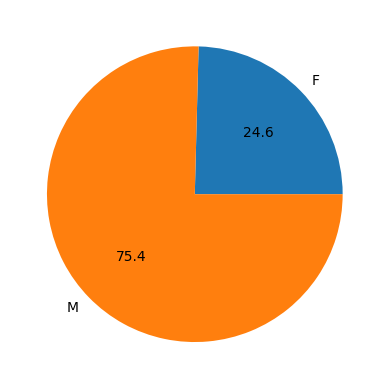

In [33]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='Age', ylabel='count'>

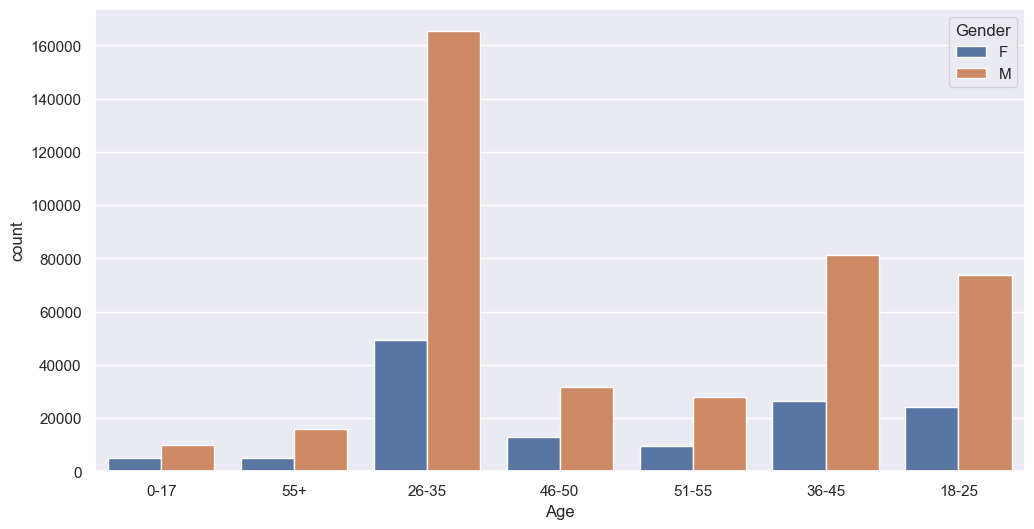

In [37]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

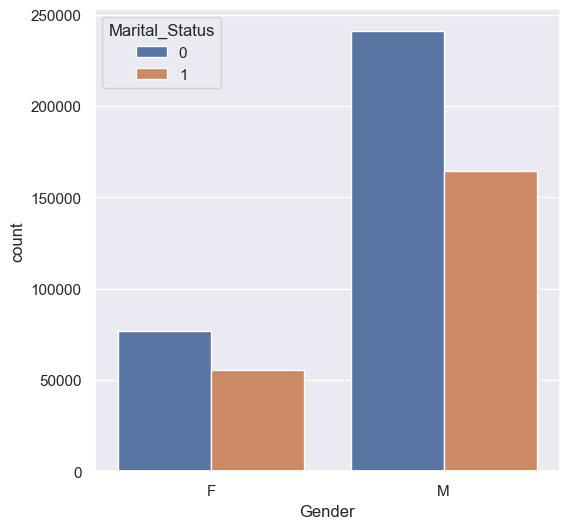

In [38]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

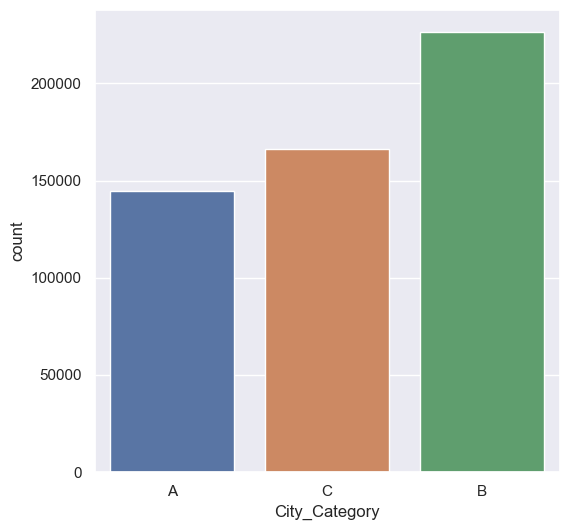

In [39]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

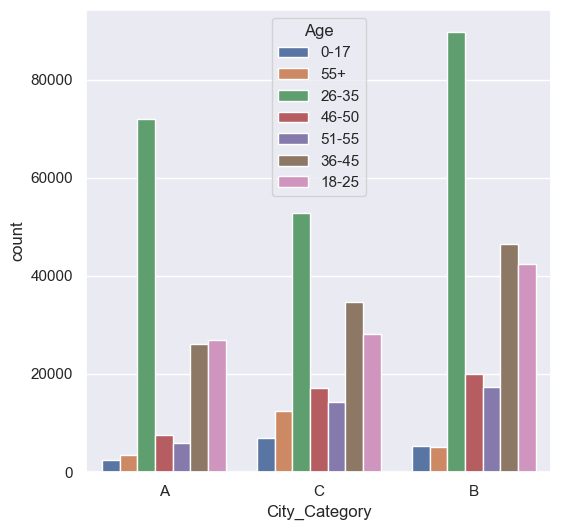

In [40]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

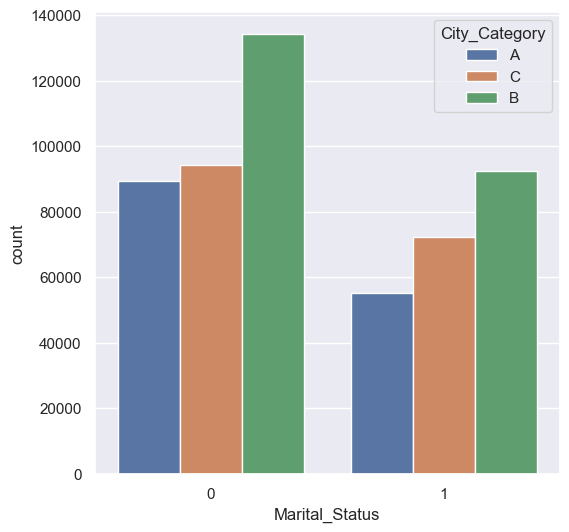

In [41]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

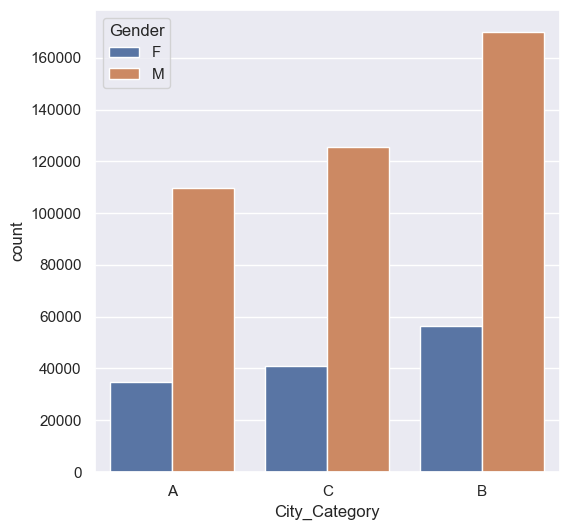

In [42]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<Axes: ylabel='Purchase'>

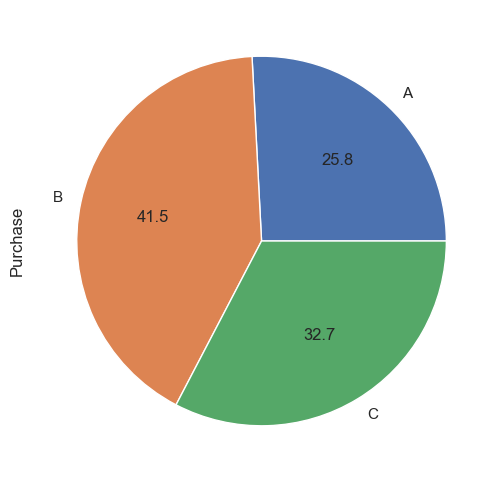

In [43]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<Axes: >

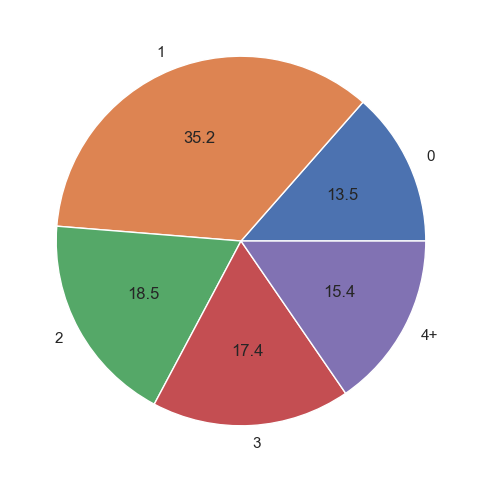

In [44]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

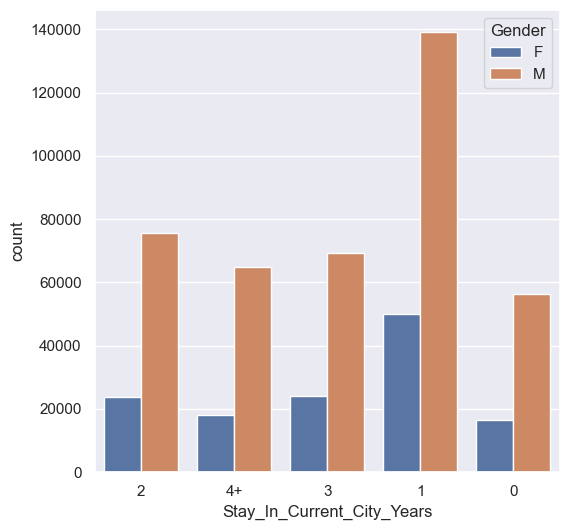

In [45]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

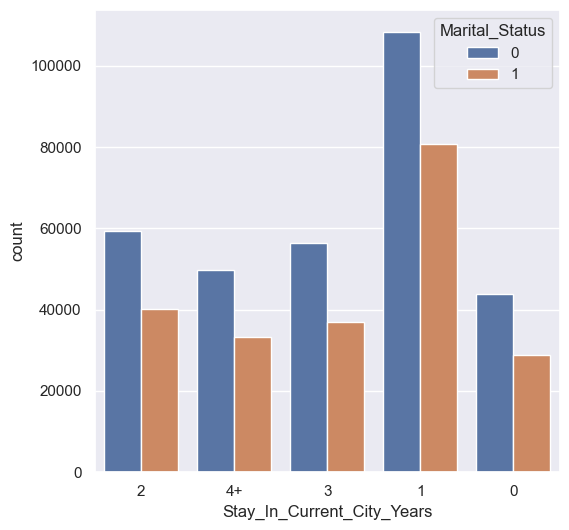

In [46]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

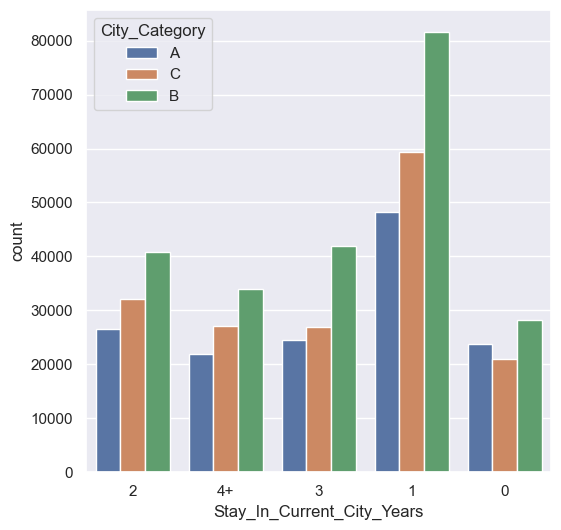

In [47]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

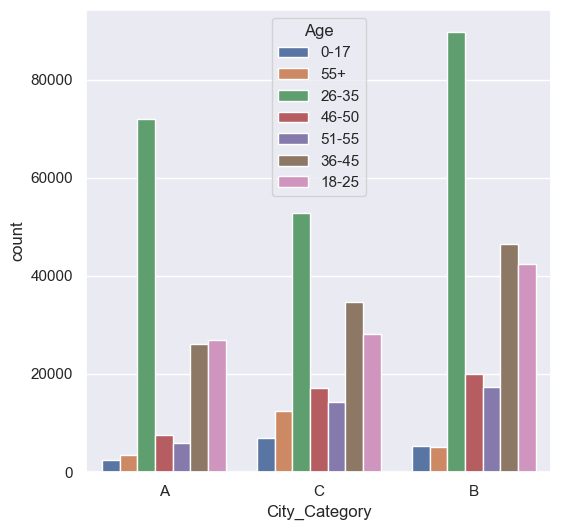

In [48]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<Axes: xlabel='Occupation'>

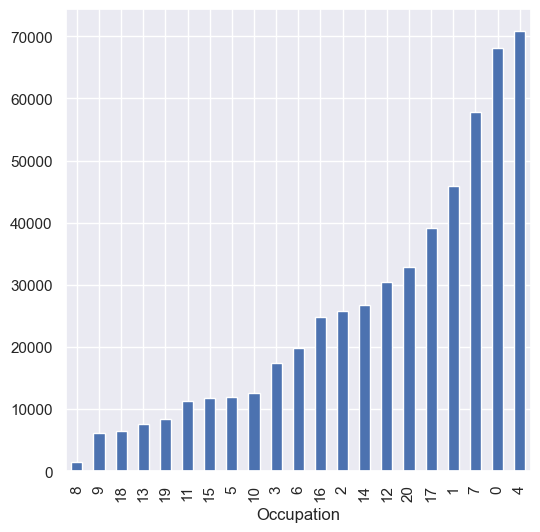

In [49]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

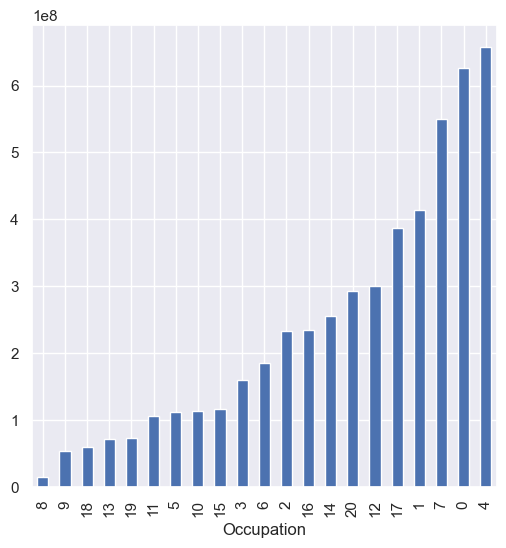

In [50]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

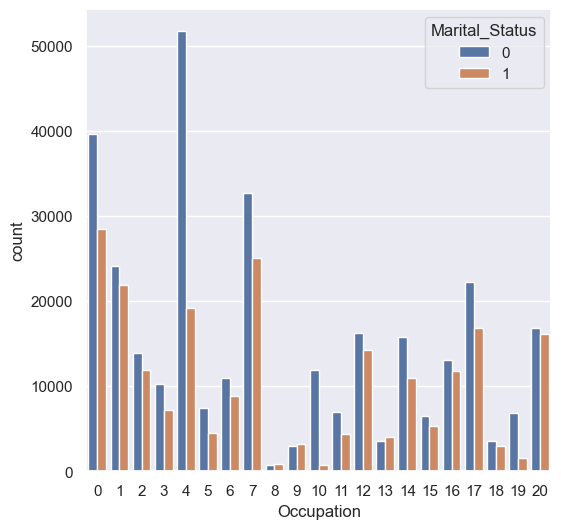

In [51]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

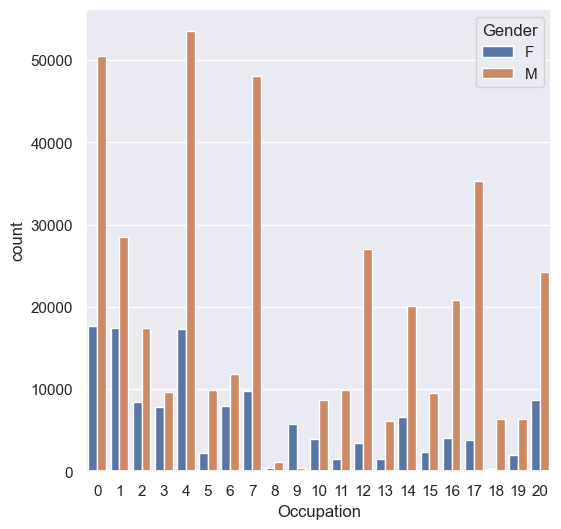

In [52]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1'>

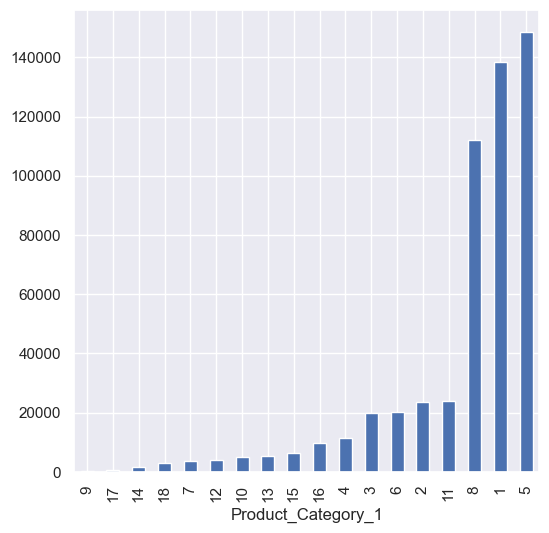

In [54]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

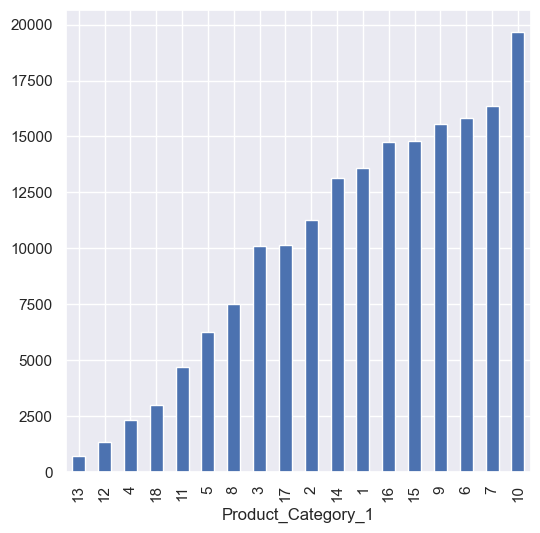

In [58]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

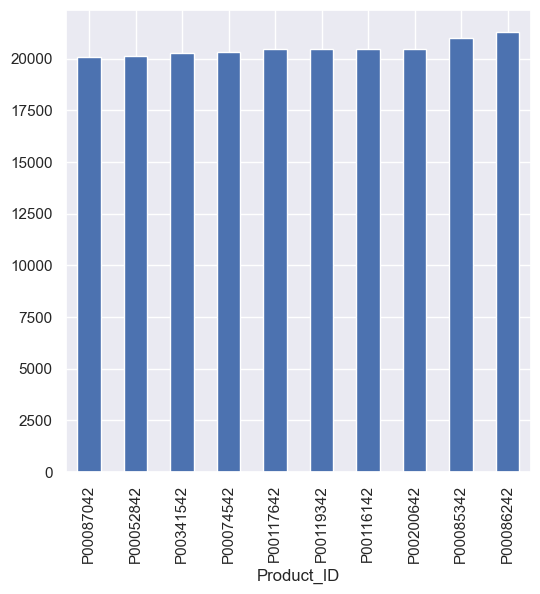

In [57]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

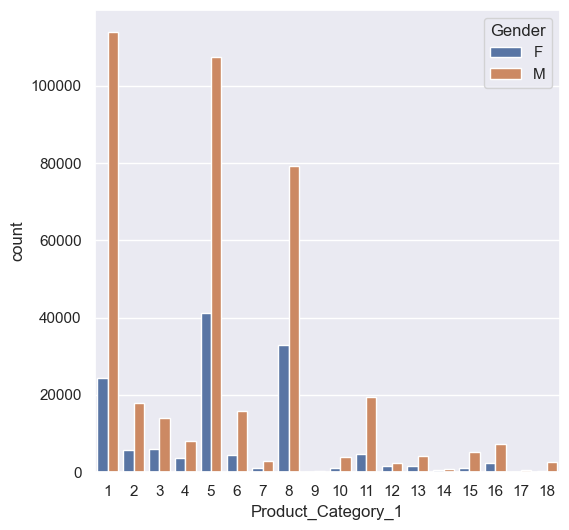

In [59]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

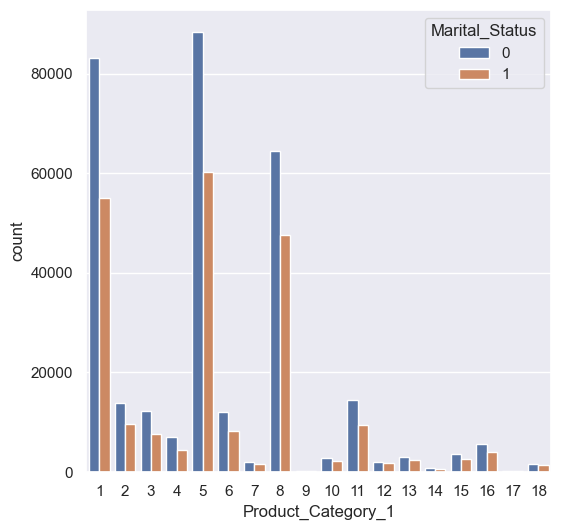

In [60]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

In [61]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

<Axes: xlabel='Age', ylabel='count'>

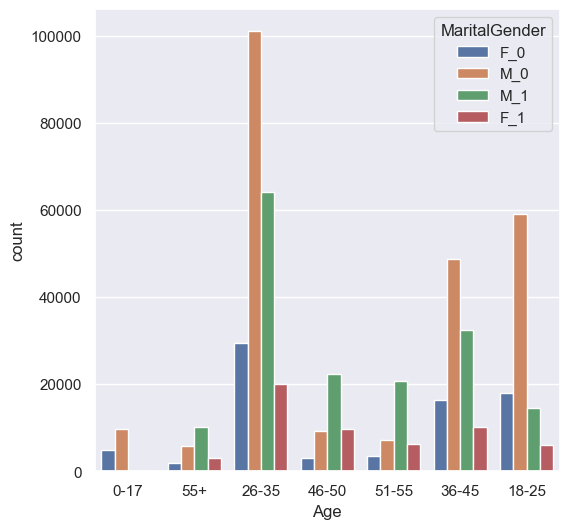

In [62]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

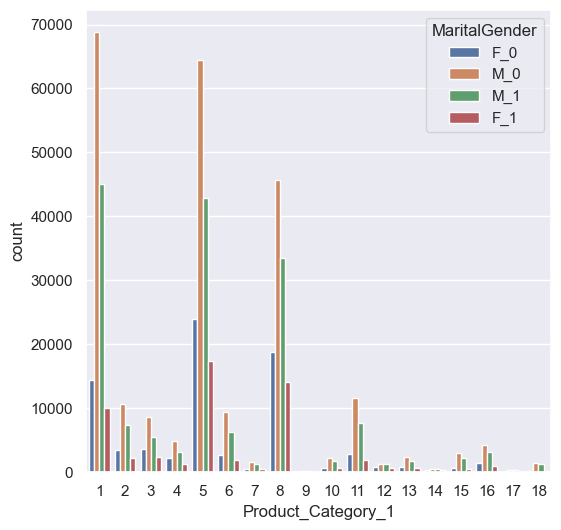

In [63]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

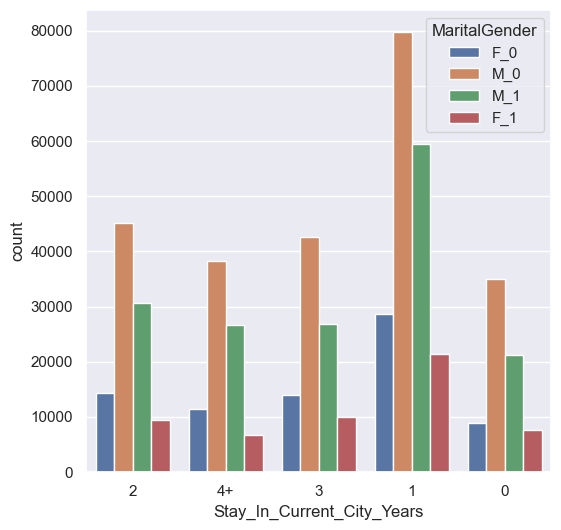

In [64]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

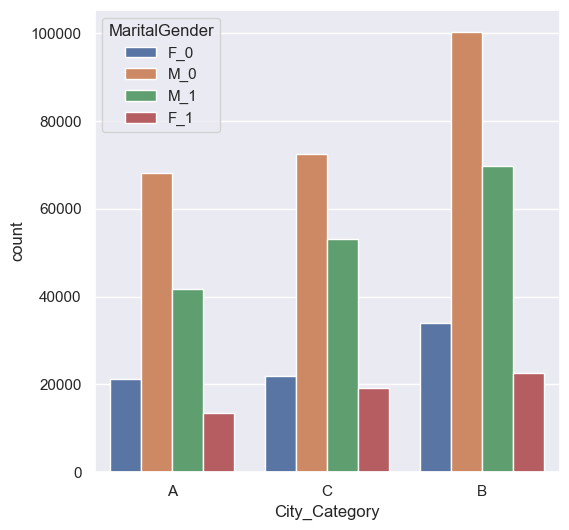

In [65]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])